In [3]:
import pandas as pd
import matplotlib
import numpy as np
# import utilities as ut

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style('white')
# mpl.rcParams.update({'font.family': ['Arial',]})

from scipy import stats

In [5]:
import sys
sys.path.append('src')
# from utils.data import GenotypeLookup
# from utils.viz import colors


In [6]:
%matplotlib notebook

In [8]:
datapath = '//allen/programs/braintv/workgroups/neuralcoding/Behavior/Data/visual_behavior_development/BehaviorManuscriptData/data'
summary = pd.read_csv('{}/01_standardized_training_summary.csv'.format(datapath),index_col=0)

# genotype_lookup = GenotypeLookup(datapath=datapath)
# summary['genotype'] = summary['mouse_id'].map(genotype_lookup)

In [9]:
summary

,cohort,mouse_id,task,stage_number,training_day,session_duration,d_prime_peak,discrim_p,response_bias,earned_water,...,rig_id,stimulus,stage,n_rewards,peak_reward_rate,num_engaged_trials,session_datetime,expert_session,expert_level,expert_first
0,10,M318631,DetectionOfChange_General,1,0,3600.031463,0.557523,6.533010e-01,0.207171,0.31,...,unknown,full_screen_square_wave,static_full_field_gratings,31,inf,5,2017-07-03 17:45:30.465,False,False,False
1,10,M318631,DetectionOfChange_General,1,1,3600.040009,0.995779,4.920012e-02,0.450000,0.76,...,unknown,full_screen_square_wave,static_full_field_gratings,77,inf,1,2017-07-04 15:22:38.310,False,False,False
2,10,M318631,DetectionOfChange_General,1,2,3600.016324,1.496660,5.085146e-05,0.812500,0.52,...,unknown,full_screen_square_wave,static_full_field_gratings,52,inf,0,2017-07-05 17:45:20.211,False,False,False
3,10,M318631,DetectionOfChange_General,1,3,3600.016298,3.202022,4.350773e-18,0.746667,0.95,...,unknown,full_screen_square_wave,static_full_field_gratings,95,inf,0,2017-07-06 17:34:51.709,False,False,False
4,10,M318631,DetectionOfChange_General,1,4,2982.345780,4.652696,9.357266e-32,0.485294,1.29,...,unknown,full_screen_square_wave,static_full_field_gratings,129,inf,0,2017-07-07 16:48:57.763,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,23,M390905,DetectionOfChange_General,1,2,3598.909255,2.123173,5.685507e-10,0.500000,0.75,...,E6,full_screen_square_wave,static_full_field_gratings,75,inf,0,2018-06-27 21:34:14.750,False,False,False
1884,23,M390905,DetectionOfChange_General,1,3,3598.326864,2.757075,1.222232e-08,0.575000,0.62,...,E6,full_screen_square_wave,static_full_field_gratings,62,inf,0,2018-06-28 21:04:27.586,False,False,False
1885,23,M390905,DetectionOfChange_General,2,4,3598.888224,2.520821,3.431306e-10,0.554217,0.79,...,E6,full_screen_square_wave,static_windowed_gratings_flash_500ms,79,inf,0,2018-06-29 22:03:34.541,False,False,False
1886,23,M390905,DoC_NaturalImages_CAMMatched_n=8,3,5,3598.421034,1.802743,6.801402e-02,0.587879,0.89,...,E6,Natural_Images_Lum_Matched_set_training_2017.0...,natural_images,89,inf,0,2018-07-02 20:02:12.597,True,False,True


In [5]:
def is_last_day(row):
    mouse_id = row['mouse_id']
    return row['session_datetime'] == summary.query('mouse_id == @mouse_id')['session_datetime'].max()
summary['last_day'] = summary.apply(is_last_day,axis=1)

In [6]:
toplevel_figure_folder = '/home/dougo/dropbox/BrainTV-BehaviorDevelopment/Manuscripts/2019 - DoC_Behavioral_Characterization/Figures/Figures'
figure_folder = 'Figure 2 - Automated training x Cre/Figure 2 components_v2'

figure_savepath = os.path.join(toplevel_figure_folder,figure_folder)
save_figures = True

In [7]:
def clamp(val, minimum=0, maximum=255):
    if val < minimum:
        return minimum
    if val > maximum:
        return maximum
    return val

def colorscale(hexstr, scalefactor=1.0):
    """
    Scales a hex string by ``scalefactor``. Returns scaled hex string.

    To darken the color, use a float value between 0 and 1.
    To brighten the color, use a float value greater than 1.

    >>> colorscale("#DF3C3C", .5)
    #6F1E1E
    >>> colorscale("#52D24F", 1.6)
    #83FF7E
    >>> colorscale("#4F75D2", 1)
    #4F75D2
    """

    hexstr = hexstr.strip('#')

    if scalefactor < 0 or len(hexstr) != 6:
        return hexstr

    r, g, b = int(hexstr[:2], 16), int(hexstr[2:4], 16), int(hexstr[4:], 16)

    r = clamp(r * scalefactor)
    g = clamp(g * scalefactor)
    b = clamp(b * scalefactor)

    return "#%02x%02x%02x" % (r, g, b)

## count mice per genotype:

In [8]:
summary.groupby('genotype').apply(lambda df: len(df['mouse_id'].unique()))

genotype
Cux2-CreERT2          4
Rbp4-Cre_KL100       12
Slc17a7-IRES2-Cre    23
Sst-IRES-Cre          7
Vip-IRES-Cre         14
dtype: int64

## build colormaps

In [9]:
n_stage = summary['stage_number'].max()

palettes = {g:sns.light_palette(c,n_stage+1)[1:] for g,c in colors.items()}
cmaps = {g:sns.light_palette(c,n_stage+1,as_cmap=True) for g,c in colors.items()}

## get genotypes to include

In [10]:
genotypes_to_include = (summary
    .groupby(['genotype','mouse_id'])
    .size()
    .reset_index()
    .groupby('genotype')
    .size()
)

# increment training day by 1 to make counting match natural notation (e.g., day 1 = 1 instead of day 1 = 0)
summary['training_day'] += 1

<IPython.core.display.Javascript object>


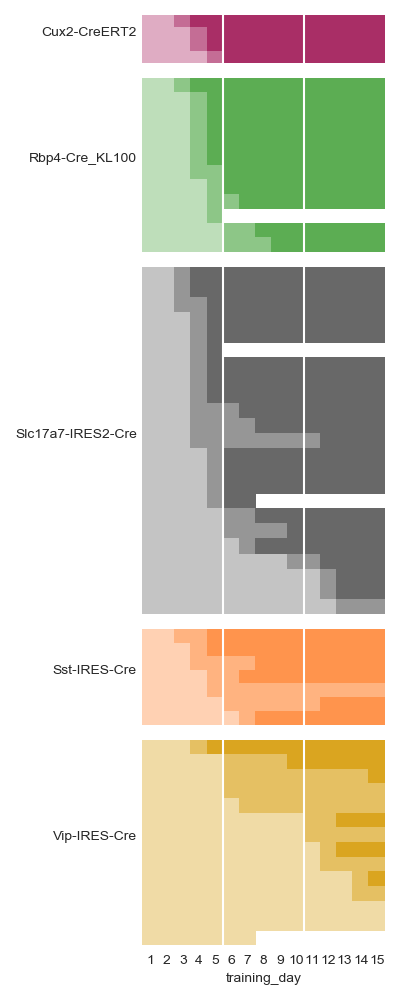

In [11]:
n_mouse = len(summary['mouse_id'].unique())
n_plots = len(summary['genotype'].unique())


fig = plt.figure(figsize=(4,10))

gs = gridspec.GridSpec(n_mouse, 1)
n = 0

overall_mouse_order = []
for jj, (genotype, cre_summary) in enumerate(summary[summary['training_day']<16].groupby('genotype')):
    
    n_mouse = len(cre_summary['mouse_id'].unique())
    
    ax = plt.subplot(gs[n:n+n_mouse, 0])
    n += n_mouse
    
#     ax = ax_[jj]

    mouse_order = (cre_summary
        .groupby(['mouse_id','stage_number'])
        ['training_day']
        .min()
        .reset_index()
        .pivot(index='mouse_id',columns='stage_number')
        .sort_values([('training_day',s) for s in (2,3,)],ascending=True)
        .index
    )
    overall_mouse_order += mouse_order.tolist()

    learning_stages = cre_summary.pivot(index='mouse_id',columns='training_day',values='stage_number')
    learning_stages = learning_stages.loc[mouse_order]
    
    expertise = cre_summary.pivot(index='mouse_id',columns='training_day',values='expert_session')
    expertise = expertise.loc[mouse_order]
    expertise = expertise.applymap(lambda x: u'\u25BC' if x is True else '')

    sns.heatmap(
        learning_stages,
        cmap=cmaps[genotype],
        ax=ax,
        vmin=0,
        vmax=3,
        cbar=None,
        yticklabels=False,
        xticklabels='auto',
    )
    ylabel = genotype
    ax.set_ylabel(ylabel,rotation=0,ha='right')
    if jj<n_plots-1:
        ax.set_xticks([])
        ax.set_xlabel('')
    ax.axvline(5,color='w')
    ax.axvline(10,color='w')
fig.tight_layout()
figtitle = 'fig_2b_training_matrix'
if save_figures:
    ut.save_figure(fig,os.path.join(figure_savepath,figtitle),formats=['.pdf'])

In [12]:
def first_stage_3_day(mouse_id):
    return summary.query('stage_number==3 and mouse_id == @mouse_id')['training_day'].min()
def first_stage_2_day(mouse_id):
    return summary.query('stage_number==2 and mouse_id == @mouse_id')['training_day'].min()
def first_expert_day(mouse_id):
    return summary.query('expert_session == True and mouse_id == @mouse_id')['training_day'].min()

mouse_order = (summary
    .groupby(['genotype','mouse_id','stage_number'])
    ['training_day']
    .min()
    .reset_index()
    .pivot(index='mouse_id',columns='stage_number')
    .sort_values([('training_day',s) for s in (2,3,)],ascending=True)
    .index
)

training_matrix_summary = summary[['genotype','mouse_id','training_day']].groupby(['genotype','mouse_id']).max().reset_index()
training_matrix_summary['days_to_stage_3'] = training_matrix_summary['mouse_id'].map(first_stage_3_day) - 1 # subtract 1 to get days to stage
training_matrix_summary['days_to_stage_2'] = training_matrix_summary['mouse_id'].map(first_stage_2_day) - 1 # subtract 1 to get days to stage
training_matrix_summary['days_to_first_expert'] = training_matrix_summary['mouse_id'].map(first_expert_day)
training_matrix_summary.set_index('mouse_id',inplace=True)


#### note: of the 4 mice that did not get to stage 3, one (M376801) met the criteria to advancement on its last day. Therefore, we'll manually fill its training summary

In [13]:
mice_who_did_not_make_it = training_matrix_summary[pd.isnull(training_matrix_summary['days_to_stage_3'])].reset_index()['mouse_id'].values
summary.query('last_day == True and mouse_id in @mice_who_did_not_make_it')[['mouse_id','genotype','stage','num_contingent_trials','d_prime_peak']]

,mouse_id,genotype,stage,num_contingent_trials,d_prime_peak
576,M333115,Vip-IRES-Cre,static_windowed_gratings_flash_500ms,395,0.000000
680,M336247,Vip-IRES-Cre,static_full_field_gratings,108,0.000000
1083,M360543,Sst-IRES-Cre,static_windowed_gratings_flash_500ms,416,1.008337
1652,M376801,Rbp4-Cre_KL100,static_windowed_gratings_flash_500ms,300,2.370990


In [14]:
training_matrix_summary.at['M376801','days_to_stage_3'] = training_matrix_summary.at['M376801','training_day']+1

In [15]:
if save_figures:
    training_matrix_summary.loc[overall_mouse_order].reset_index().to_csv(os.path.join(figure_savepath,'training_summary.csv'))

In [16]:
training_matrix_summary.sample(5)

,genotype,training_day,days_to_stage_3,days_to_stage_2,days_to_first_expert
mouse_id,,,,,
M330194,Rbp4-Cre_KL100,41,4.0,3.0,5.0
M324022,Slc17a7-IRES2-Cre,40,11.0,9.0,12.0
M333115,Vip-IRES-Cre,39,NaN,32.0,NaN
M330982,Vip-IRES-Cre,41,39.0,13.0,40.0
M354477,Slc17a7-IRES2-Cre,41,7.0,3.0,8.0


In [17]:
days_per_stage = (summary[summary['stage_number']<4]
    .groupby(['genotype','mouse_id','stage_number'])
    .size()
    .reset_index()
    .rename(columns={0:'days'})
    )
days_per_stage.head()

,genotype,mouse_id,stage_number,days
0,Cux2-CreERT2,M373115,1,4
1,Cux2-CreERT2,M373115,2,1
2,Cux2-CreERT2,M373115,3,29
3,Cux2-CreERT2,M373118,1,3
4,Cux2-CreERT2,M373118,2,1


In [18]:
genotype_order = np.sort(summary['genotype'].unique())
genotype_palette = [colors[g] for g in genotype_order]

<IPython.core.display.Javascript object>


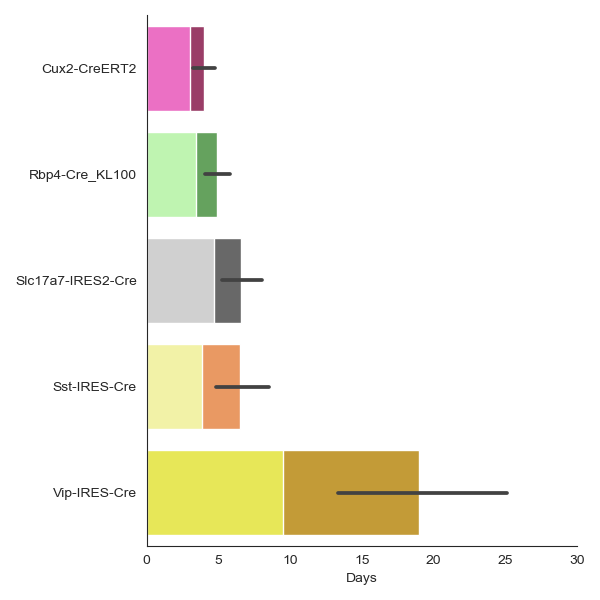

In [19]:
stacks = (
    ('days_to_stage_3', 1.0),
    ('days_to_stage_2', 2.0),
)
fig,ax=plt.subplots(figsize = (6,6))
for col,scalefactor in stacks:
    palette = [colorscale(h,int(scalefactor)) for h in genotype_palette]
    g = sns.barplot(x=col,
                    y='genotype',
                    data=training_matrix_summary.dropna(),
                    ci=95 if col == 'days_to_stage_3' else None,
                    order=genotype_order,
                    palette=palette,
                    ax=ax
                   )
g.set_xlabel('Days')
g.set_ylabel('')
g.axes.set_facecolor('w')
sns.despine()

g.axes.set_xlim(0,30)
fig.tight_layout()

figtitle='2C-average_days_to_stages(errobars=95_percent_CI)'
if save_figures:
    ut.save_figure(fig,os.path.join(figure_savepath,figtitle),formats=['.pdf'])

In [20]:
training_matrix_summary.groupby('genotype')[['days_to_stage_2','days_to_stage_3']].mean()

,days_to_stage_2,days_to_stage_3
genotype,,
Cux2-CreERT2,3.000000,4.000000
Rbp4-Cre_KL100,3.500000,5.000000
Slc17a7-IRES2-Cre,4.695652,6.608696
Sst-IRES-Cre,3.857143,6.500000
Vip-IRES-Cre,11.230769,19.000000


In [22]:
training_matrix_summary.groupby('genotype')[['days_to_stage_2','days_to_stage_3']].std()

,days_to_stage_2,days_to_stage_3
genotype,,
Cux2-CreERT2,0.816497,0.816497
Rbp4-Cre_KL100,0.904534,1.477098
Slc17a7-IRES2-Cre,3.036667,3.538607
Sst-IRES-Cre,1.345185,2.588436
Vip-IRES-Cre,8.001602,10.921205


In [25]:
genotype_order = np.sort(summary['genotype'].unique())
genotype_palette = [colors[g] for g in genotype_order]

summary.sort_values(['genotype','mouse_id','training_day'],inplace=True)

mouse_order = summary[['genotype','mouse_id']].drop_duplicates()['mouse_id'].values

In [26]:
first_day = (summary
    .groupby(['mouse_id','stage_number'])['training_day']
    .min()
)
summary['first_day'] = summary.apply(lambda row: first_day[(row['mouse_id'],row['stage_number'])],axis=1)
summary['days_on_stage'] = summary['training_day'] - summary['first_day']

In [27]:
summary['session_id'] = summary.apply(lambda r: r['mouse_id'] + '_' + r['session_datetime'], axis=1)

In [28]:
metrics = ['d_prime_peak','lick_latency_median']

summary_long = pd.melt(
    summary,
    id_vars=['genotype','expert_session','mouse_id','stage_number','training_day','session_id','days_on_stage'],
    value_vars=metrics,
    var_name='metric',
)
summary_long.head()

,genotype,expert_session,mouse_id,stage_number,training_day,session_id,days_on_stage,metric,value
0,Cux2-CreERT2,False,M373115,1,1,M373115_2018-03-05 22:33:13.125,0,d_prime_peak,0.158294
1,Cux2-CreERT2,False,M373115,1,2,M373115_2018-03-06 22:22:46.400,1,d_prime_peak,1.024836
2,Cux2-CreERT2,False,M373115,1,3,M373115_2018-03-07 22:17:14.783,2,d_prime_peak,3.038791
3,Cux2-CreERT2,False,M373115,1,4,M373115_2018-03-08 21:59:25.022,3,d_prime_peak,3.593424
4,Cux2-CreERT2,False,M373115,2,5,M373115_2018-03-09 21:52:46.786,0,d_prime_peak,2.998927


In [29]:
summary_long['stage_number'] = summary_long['stage_number'].map(lambda x: np.clip(x,0,3))


In [31]:
def annotate_rt(ax,ymax=2,response_window=(0.15,1.0)):
    ax.axhspan(*response_window,color='0.9',zorder=-1000)
    ax.set_ylim([0,ymax])
    return ax

In [34]:
mouse_summary[mask]

,genotype,expert_session,mouse_id,stage_number,training_day,session_id,days_on_stage,metric,value
195,Rbp4-Cre_KL100,False,M328341,1,1,M328341_2017-07-17 21:25:35.094,0,d_prime_peak,0.439607
196,Rbp4-Cre_KL100,False,M328341,1,2,M328341_2017-07-18 18:55:25.944,1,d_prime_peak,1.818326
197,Rbp4-Cre_KL100,False,M328341,1,3,M328341_2017-07-19 17:34:05.230,2,d_prime_peak,2.850748
198,Rbp4-Cre_KL100,False,M328341,1,4,M328341_2017-07-20 17:21:26.148,3,d_prime_peak,3.445306
199,Rbp4-Cre_KL100,False,M328341,2,5,M328341_2017-07-21 20:53:05.912,0,d_prime_peak,1.791560
200,Rbp4-Cre_KL100,False,M328341,2,6,M328341_2017-07-24 18:40:17.997,1,d_prime_peak,2.866863
201,Rbp4-Cre_KL100,True,M328341,3,7,M328341_2017-07-25 17:45:15.126,0,d_prime_peak,2.162392
202,Rbp4-Cre_KL100,True,M328341,3,8,M328341_2017-07-26 18:00:26.687,1,d_prime_peak,3.234806
203,Rbp4-Cre_KL100,True,M328341,3,9,M328341_2017-07-27 18:01:55.877,2,d_prime_peak,2.892297
204,Rbp4-Cre_KL100,True,M328341,3,10,M328341_2017-07-28 16:51:17.019,3,d_prime_peak,2.608363


/home/dougo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


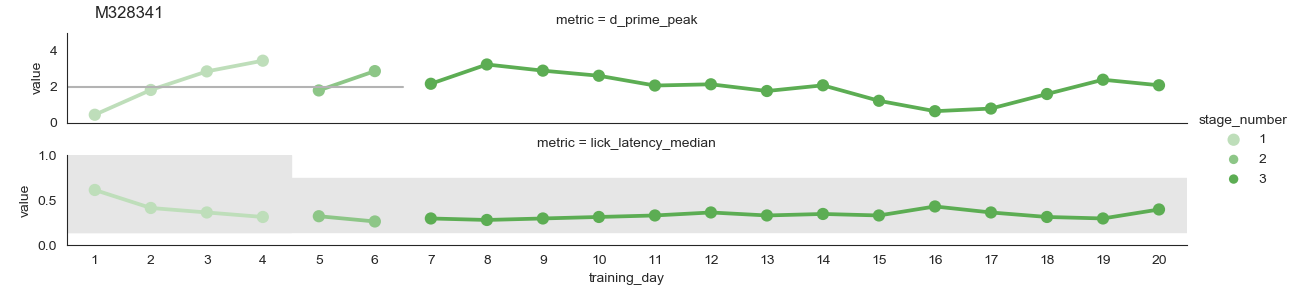

In [33]:
from matplotlib import patches

# exemplar = 'M348627'
# exemplar = 'M318631'
exemplar = 'M328341'

exemplar_genotype = genotype_lookup[exemplar]

mouse_summary = summary_long[summary_long['mouse_id']==exemplar]

mouse_summary['stage_number'] = mouse_summary['stage_number'].map(lambda x: np.clip(x,0,3))

mask = mouse_summary['training_day']<=20

g = sns.factorplot('training_day','value',data=mouse_summary[mask],
               row='metric',
               size=1.5,
               aspect=8,
               sharey='row',
               hue='stage_number',
               palette=palettes[exemplar_genotype],
              )

n = (mouse_summary[mask].groupby('training_day').mean()['stage_number']<3).sum()

ax = g.axes[0,0]
ax.plot(np.array([0,n])-0.5,[2,2],'-',color='0.7')
ax.set_ylim([0,5])

annotate_rt(g.axes[1,0],response_window=[0.15,0.75])
n = (mouse_summary[mask].groupby('training_day').mean()['stage_number']<2).sum()

ax.set_xlim([-0.5,19.5])

ax = g.axes[1,0]
xy = [-0.5,0.15]
width, height = n, 0.85
patch = patches.Rectangle(xy,width,height,facecolor='0.9',edgecolor='0.9',zorder=-1000)
ax.add_patch(patch)
# ax.plot(np.array([0,n])-0.5,[2,2],'-',color='0.7')
ax.set_ylim([0,1])

plt.suptitle(exemplar,x=0.1)
fig = plt.gcf()

savepath = os.path.split(datapath)[0]
# ut.save_figure(fig,os.path.join(savepath,'328341_exemplar_v2'),formats=[".pdf",".png"])
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
fig.savefig(os.path.join(savepath,'328341_exemplar_v3.pdf'))
fig.savefig(os.path.join(savepath,'328341_exemplar_v3.png'))